# **Time Series Forecasting of Netflix Stock Prices**

# Nextflix Stock Market Prediction using Time Series Forecasting (XGBOOST)

The project's goal is to leverage time series analysis to predict stock market price of Netflix. 

# Data
Many academics and analysts have found it challenging to master the art of predicting stock values. Indeed, investors are keenly engaged in the field of stock price prediction research. Many investors want to know the stock market's future scenario in order to make a smart and profitable investment. Good and successful stock market prediction systems assist traders, investors, and analysts by giving useful information such as the stock market's future direction.

The dataset is taken from Kaggel - Netflix Stock Price Prediction.The Dataset contains data for 5 years(5th Feb 2018 to 5th Feb 2022).
Some of the features in the data are:

1. Date - Everyday price
2. Open - Price at which stock opens
3. High - Today's High
4. Low - Today's low
5. Close - Close price adjusted for splits
6. Adj Close - Adjusted close price adjusted for splits and dividend and/or capital gain distributions.
7. Volume - Volume of stocks. 


# Importing Dataset
The very first step of virtually every data science project is importing the dataset we’ll be working with along with the libraries needed for the first sections.

The libraries needed for the data import and EDA portions of the project are certainly Pandas and NumPy, along with Matplotlib and Seaborn.

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In this code, several libraries are imported, including google.colab for working with Google Colaboratory, pandas for data manipulation and analysis, numpy for numerical computation, matplotlib.pyplot for data visualization, and seaborn for creating more visually appealing plots. This code makes these libraries available to the rest of the program by importing them.

In [ ]:
uploaded = files.upload()

Saving NFLX.csv to NFLX.csv


Uploading files is enabled by this code. Uploading files from the local machine is done using the files.upload() function. The uploaded files are stored in the uploaded variable, which can be accessed and used later.

In [215]:
df = pd.read_csv('NFLX.csv')
df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900

A CSV file named 'NFLX.csv' is read and its contents are assigned to a variable called df. Using the pandas library, pd.read_csv() reads the CSV file and creates a DataFrame, which is a tabular data structure. To display the first few rows of the DataFrame, the df.head() function is called after reading the file. As a result, we can check that the data has been loaded successfully and get a quick glance at it.

In [216]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

              Volume  
Date                  
2018-02-05  11896100  
2018-02-06  12595800  
2018-02-07   8981500  
2018-02-08   9306700  
2018-02-09  16906900

By setting the 'Date' column as the new index, the DataFrame df is modified. DataFrames are indexed by the 'Date' column, which is set using the df.set_index('Date') function. Using pd.to_datetime(df.index), the code converts the index values into datetime format. The index values are interpreted as dates, allowing for easier manipulation and analysis of time-based data. As a final step, the df.head() function is called to display the first few rows of the modified DataFrame, displaying the updated index and data columns.

Checking if the dataset contains any null values

In [217]:
nan_count = df.isna().sum().sum()
nan_count

0

It calculates the total number of missing values (NaN) in the DataFrame df. The first step is to check each element of the DataFrame and return a new DataFrame with each element being either True or False depending on whether it is a missing value (NaN). On the resulting DataFrame, sum() is called twice. First sum() calculates the sum of True values along each column, resulting in a Series that contains the number of missing values. Using the second sum(), the total number of missing values in the entire DataFrame is calculated. In the code, the calculated count of missing values is assigned to the variable nan_count.

## **Exploratory Data Analysis**

We can now focus on data exploration and visualization.

I started by plotting a correlation matrix using seaborn. The correlation matrix shows us the single correlation between each feature and the others on the dataset. In general, the correlation can be:

< 0.3 and therefore weak
between 0.3 and 0.6 and therefore moderate
between 0.6 and 0.9 and therefore strong
/ > 0.9 extremely strong

The sign, on the other hand, indicates whether the two factors grow in the same direction or in the opposite one. A correlation of -0.9 indicates that as one variable increases the other decreases. Depending on the uncertainty of the environment though, the ranges can change. In quantitative finance, a 0.3 or 0.4 correlation can be considered strong.

Observations from the heatmap:

Open, High, Close, Adj Close, Low, are strongly correlated to all each others. 

Volume shows a weak correlation with others. 

In [218]:
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')


Using the seaborn library for data visualization, this code generates a correlation heatmap for the DataFrame df. First, plt.figure(figsize=(12, 8)) specifies the width and height in inches of the figure (plot) to be created. sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG') generates a heatmap by calculating the correlation between columns in the DataFrame using the df.corr() function. vmin and vmax define the color scale's minimum and maximum values, while annot=True shows the correlation values. A heatmap's color map is set by the cmap parameter. Next, heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12) sets the heatmap's title, specifying its text, font size, and padding. Lastly, plt.savefig('heatmap.png', dpi=300, bbox_inches='tight') saves the generated heatmap as 'heatmap.png'. DPI sets the image resolution (dots per inch), and bbox_inches='tight' makes sure the saved image includes the entire heatmap without cropping.

**Feature Creation**


In time series analysis and forecasting, “time” can be the only feature you have at your disposal so it’s better to extract as much information as possible from it. The following function creates columns out of the DateTime index. For example, at the time 1/1/2017 0:10 , the command df.index.hour will extract the value 0, since it’s midnight. df.index.dayofweek will show a 6 as January 1st, 2017 was a Sunday (numeration starts from 0), and so on.
By running the function create_features on our df, we instantly create all the features defined in the function.

In [219]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df
df = create_features(df)

The code defines the function create_features, which takes a DataFrame df as input and creates additional time series features based on the index. DataFrame df = df.copy() is used within the function to ensure that the original DataFrame is not modified. Each column represents a different time-related feature of the DataFrame df. The features include 'hour', 'dayofweek' (0-6, Monday to Sunday), 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', and 'weekofyear'. The 'hour' column represents the hour component of the index, the 'dayofweek' column represents the day of the week, 'quarter' represents the quarter of the year, 'month' represents the month of the year, 'year' represents the year, 'dayofyear' represents the day of the year, 'dayofmonth' represents the day of the month, and 'weekofyear' represents the week of the year. As an output of the function, the modified DataFrame df is returned. A line outside the function, df = create_features(df), calls the create_features function on the DataFrame df and assigns the returned DataFrame (with additional time series features) back to df.

In [220]:
df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

              Volume  hour  dayofweek  quarter  month  year  dayofyear  \
Date                                                                     
2018-02-05  11896100     0          0        1      2  2018         36   
2018-02-06  12595800     0          1        1      2  2018         37   
2018-02-07   8981500     0          2        1      2  2018         38   
2018-02-08   9306700     0          3        1      2  2018         39   
2018-02-09  16906900     0          4        1      2  2018         40   

            dayofmonth  weekofyear  
Date                                
2018-02-05           5           6  
2018-02-06           6           6  
2018-02-07           7           6  
2018-02-08           8           6  
2018-02-09           9           6

In this code, the first few rows of the DataFrame df are displayed. Head() returns the first five rows of the DataFrame by default, although a different number can be specified within the parentheses. We can quickly inspect the values and structure of the DataFrame by calling df.head(), which shows a preview of the data.

In [189]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(8,5))
sns.boxplot(x='year', y='Close', data=df, ax=ax, showfliers=False)
plt.show()

The following code creates a boxplot using the seaborn library to visualize the distribution of 'Close' values across years in a DataFrame df. Seaborn is imported first with import seaborn as sns. Fig, ax = plt.subplots(1, figsize=(8,5)) creates the plot's figure and axes objects. Figsize specifies the figure's dimensions in inches. The boxplot is generated by sns.boxplot(x='year', y='Close', data=df, ax=ax, showfliers=False). In this case, the x parameter sets the variable to display on the x-axis, which is 'year'. Using the y parameter, the variable will be displayed on the y-axis, which is 'Close'. DataFrame df from which data will be extracted is specified by the data parameter. Ax specifies the axes object on which the plot will be drawn. In the boxplot, the showfliers=False parameter indicates that outliers should not be displayed. Lastly, plt.show() displays the boxplot.

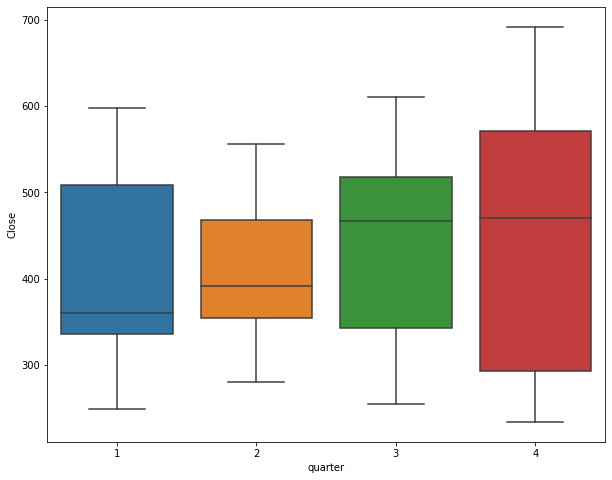

In [190]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(10,8))
sns.boxplot(x='quarter', y='Close', data=df, ax=ax, showfliers=False)
plt.show()

To visualize the distribution of the 'Close' values in the DataFrame df across different quarters, this code uses the seaborn library. With the line import seaborn as sns, the seaborn library is imported first. Then, fig, ax = plt.subplots(1, figsize=(10,8)) creates a figure and axes object. In inches, the figsize parameter specifies the figure's dimensions. Sns.boxplot(x='quarter', y='close', data=df, ax=ax, showfliers=False) generates the boxplot. A variable is displayed on the x-axis when the x parameter is set to 'quarter'. Y sets the variable to be displayed on the y-axis, which is 'Close'. DataFrame df from which the data will be extracted is specified by the data parameter. Ax specifies the axes object where the plot will be drawn. The showfliers=False parameter indicates that outliers should not be displayed. Lastly, plt.show() displays the boxplot.

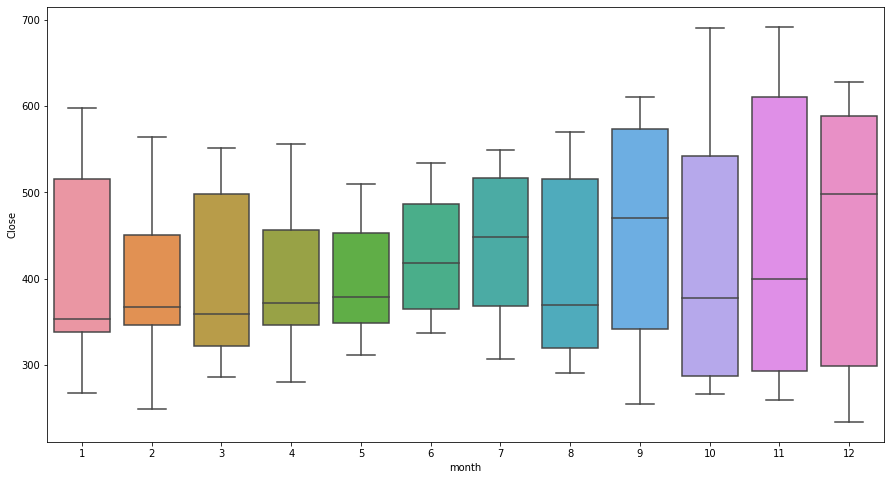

In [191]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(15,8))
sns.boxplot(x='month', y='Close', data=df, ax=ax, showfliers=False)
plt.show()

A boxplot is created using the seaborn library to visualize the distribution of 'Close' values in the DataFrame df. With the line import seaborn as sns, the seaborn library is imported first. fig, ax = plt.subplots(1, figsize=(15,8)) creates the plot's figure and axes. Inches are specified by the figsize parameter. The boxplot is generated using sns.boxplot(x='month', y='close', data=df, ax=ax, showfliers=False). 'month' is the variable displayed on the x-axis by the x parameter. A variable is displayed on the y-axis when the y parameter is set to 'Close'. This parameter specifies the DataFrame df from which the data will be extracted. Ax specifies the axes object where the plot will be drawn. The showfliers=False parameter prevents the boxplot from showing outliers. The boxplot is displayed by plt.show().

In [192]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(15,8))
sns.boxplot(x='dayofweek', y='Close', data=df, ax=ax, showfliers=False)
plt.show()

To visualize the distribution of the 'Close' values across different days of the week, this code uses the seaborn library. The seaborn library is imported first with the line import seaborn as sns. Then, fig, ax = plt.subplots(1, figsize=(15,8)) creates the figure and axes objects. In inches, the figsize parameter specifies the figure's dimensions. The boxplot is then generated by sns.boxplot(x='dayofweek', y='Close', data=df, ax=ax, showfliers=False). In this case, the x parameter sets the variable to be displayed on the x-axis, which is 'dayofweek'. By setting the y parameter, the variable will be displayed on the y-axis, which is 'Close'. This parameter specifies the DataFrame df from which the data will be extracted. Ax specifies the axes object where the plot will be drawn. Boxplots should not display outliers when showfliers=False is set. Lastly, plt.show() displays the boxplot.

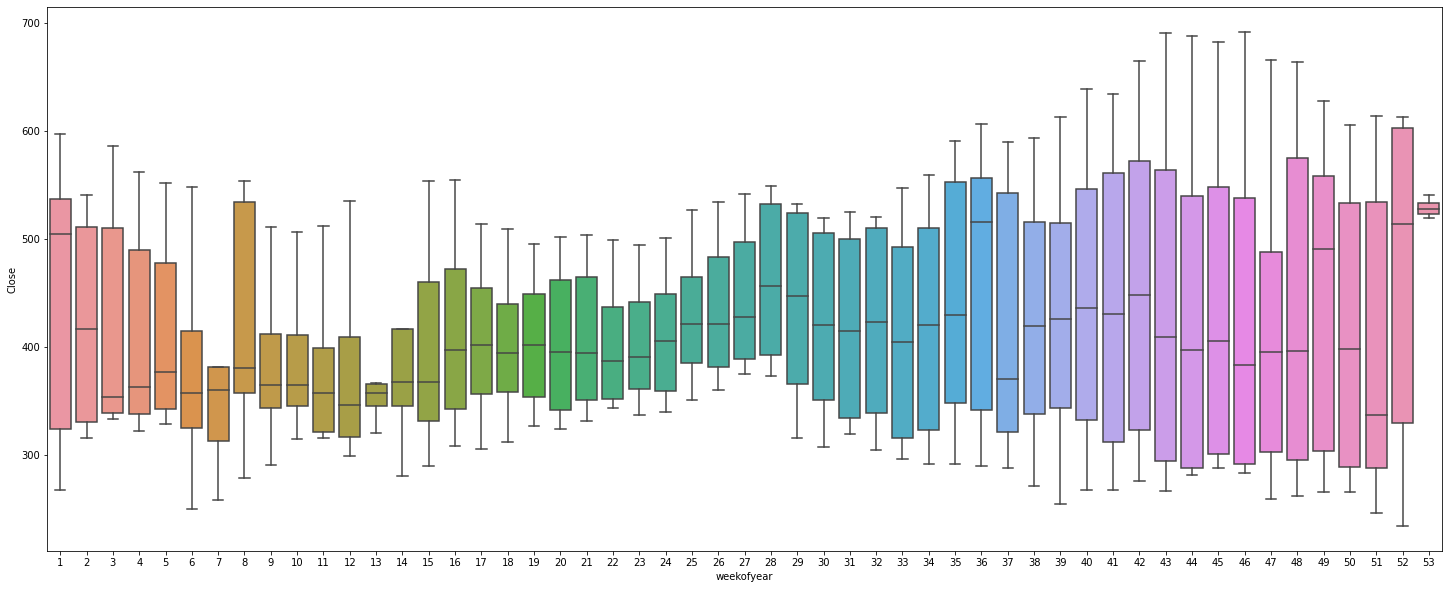

In [193]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(25,10))
sns.boxplot(x='weekofyear', y='Close', data=df, ax=ax, showfliers=False)
plt.show()

To visualize the distribution of the 'Close' values in the DataFrame df across different weeks of the year, this code creates a boxplot using the seaborn library. With the line import seaborn as sns, the seaborn library is imported first. Then, fig, ax = plt.subplots(1, figsize=(25,10)) creates the plot's figure and axes. Inches are specified by the figsize parameter. The boxplot is generated using sns.boxplot(x='weekofyear', y='Close', data=df, ax=ax, showfliers=False). In this case, the x parameter sets the variable to be displayed on the x-axis, which is 'weekofyear'. A variable is displayed on the y-axis when the y parameter is set to 'Close'. This parameter specifies the DataFrame df from which the data will be extracted. Plots are drawn on the axes object specified by the ax parameter. Boxplots with showfliers=False do not display outliers. Lastly, plt.show() displays the boxplot.

In [194]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(25,10))
sns.boxplot(x='dayofmonth', y='Close', data=df, ax=ax, showfliers=False)
plt.show()

The following code creates a boxplot using the seaborn library to visualize the distribution of the 'Close' values in the DataFrame df. Importing the seaborn library with import seaborn as sns is the first step. Fig, ax = plt.subplots(1, figsize=(25,10)) creates a figure and axes object. The figsize parameter specifies the figure's dimensions in inches. A boxplot is generated by sns.boxplot(x='dayofmonth', y='Close', data=df, ax=ax, showfliers=False). Here, the x parameter sets the variable to be displayed on the x-axis, which is 'dayofmonth'. A variable will be displayed on the y-axis if the y parameter is set to 'Close'. This parameter specifies the DataFrame df from which the data will be extracted. Plots are drawn on the axes object specified by the ax parameter. Outliers are not displayed on the boxplot when showfliers=False is set. Lastly, plt.show() displays the boxplot.

In [195]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA

For time series analysis, this code imports several modules and functions from the statsmodels library. Statsmodels.api as SM: Imports the main API module of statsmodels, which provides a range of statistical models and tools. Imports the adfuller function from statsmodels.tsa.stattools, which performs the Augmented Dickey-Fuller test for testing stationarity of a time series. The plot_acf, plot_pacf, and plot_predict functions are imported from statsmodels.graphics.tsaplots. The autocorrelation function (ACF), partial autocorrelation function (PACF), and predicted values of a time series are plotted using these functions. Imports the ARIMA model class from statsmodels.tsa.arima.model. In time series forecasting, ARIMA models are fitted using Autoregressive Integrated Moving Averages (ARIMA). The code makes these modules and functions available for use in subsequent time series analysis and modeling.

In [196]:
def ADF_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

ADF_test performs the Dickey-Fuller test on a given time series data in this code. As input, the function takes a timeseries. The function first prints the header "Results of Dickey-Fuller Test". Using the timeseries data and the autolag="AIC" parameter, it calls the adfuller function. Adfuller performs the Dickey-Fuller test and returns a tuple of results. Dftest is then assigned the returned test results. The next step is to create a pandas Series object named dfoutput. The test results and labels are stored in it. There are labels for "Test Statistic", "P-Value", "Lags Used", and "Number of Observations Used". The function then iterates through the items in dftest[4], which contain critical values for different levels of confidence. Each critical value is added to the dfoutput series with the label "Critical Value (confidence level)". Lastly, the function prints the dfoutput series, which displays the test results, including the test statistic, p-value, critical values, and the number of observations. To evaluate the stationarity of a time series, this function performs the Dickey-Fuller test and prints the test results, including the test statistic, p-value, and critical values.

In [197]:
ADF_test(df['Close'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.812591
p-value                           0.374229
Lags Used                         6.000000
Number of Observations Used    1002.000000
Critical Value (1%)              -3.436893
Critical Value (5%)              -2.864429
Critical Value (10%)             -2.568308
dtype: float64


The code calls the ADF_test function on the 'Close' column of the DataFrame. ADF_test performs the Dickey-Fuller test on a given time series and displays its results. This function takes the 'Close' column of the DataFrame df as input. ADF_test(df['Close']) evaluates the stationarity of the 'Close' time series data, and prints the results of the Dickey-Fuller test, including the test statistic, p-value, critical values, lags used, and number of observations.

# **Train Test Split**

At this stage, the dataset can be split between training and testing. In a normal scenario, we would randomly select new records to train the algorithm and test it on the remaining ones. In this case, it’s important to preserve a time sequence between the training and testing records. Therefore 70 percent of data from 2018-02-01 to 2021-06-01 is in the traning dataset and the data from 2021-06-01 to 2022-02-01 is in the testing set. 

In [221]:
X_train = df.loc[:'2021-06-01 00:00:00',['Open','High', 'Low', 'Volume', 'month', 'quarter', 'dayofweek', 'year']]
y_train = df.loc[:'2021-06-01 00:00:00', ['Close']]
X_test = df.loc['2021-06-01 00:00:00':,['Open','High', 'Low', 'Volume', 'month', 'quarter' ,'dayofweek', 'year']]
y_test = df.loc['2021-06-01 00:00:00':, ['Close']]

For a time series forecasting task, this code splits the DataFrame df into training and testing sets. Up until the timestamp '2021-06-01 00:00:00', X_train is assigned a subset of df that includes columns 'Open', 'High', 'Low', 'Volume', 'month', 'quarter', 'dayofweek', and 'year'. Up until the timestamp '2021-06-01 00:00:00', y_train is assigned only the 'Close' column of df. From the timestamp '2021-06-01 00:00:00' until the end of the DataFrame, X_test is assigned the columns 'Open', 'High', 'Low', 'Volume', 'month', 'quarter', 'dayofweek', and 'year'. A subset of df is assigned to y_test that includes only the 'Close' column starting from the timestamp '2021-06-01 00:00:00' until the end of the DataFrame. In summary, this code divides the data into training and testing sets based on a specific timestamp, with the training set (X_train and y_train) containing data up until '2021-06-01 00:00:00' and the testing set (X_test and y_test) containing data starting from '2021-06-01 00:00:00' onwards.

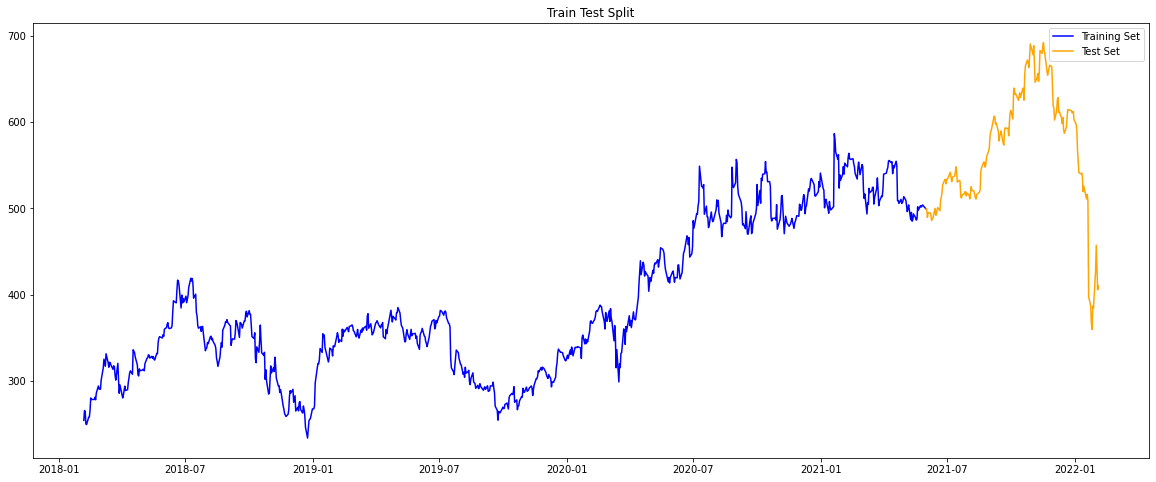

In [222]:
plt.figure(figsize=(20, 8))
plt.plot(X_train.index, y_train, label='Training Set',color='blue')
plt.plot(X_test.index, y_test, label='Test Set', color = 'orange')
plt.legend()
plt.title('Train Test Split')
plt.show()

In this code, a line plot is generated to visualize the train-test split of time series data. plt.figure(figsize=(20, 8)) creates a figure with a width and height specified in inches. Using plt.plot(X_train.index, y_train, label='Training Set', color='blue'), the X_train.index represents the x-axis values (time index) and y_train represents the y-axis values (target variables). 'Training Set' is labeled on the line in blue color. The test set data is plotted using plt.plot(X_test.index, y_test, label='Test Set', color = 'orange'), where X_test.index represents the x-axis values (time index) and y_test represents the y-axis values (target variable values). It is labeled 'Test Set' and colored orange. Plot.legend() gives the user a legend that distinguishes between the lines for the training and test sets. Plot.title('Train Test Split') gives the plot the title 'Train Test Split'. A line plot represents the data points for the training and test sets in this code, displaying the train-test split of time series data.

# **Predictions**

To predict records in our test set I have used Gradient Bossting (XGBOOST) algorithm. 

Hyperparameters settings for the algorithm is as follows:


n_estimators : the number of learning rounds the XGBoost algorithm will try to learn from the training data

max_depth : the maximum depth a tree can have, a deeper tree is more likely to cause overfitting

learning_rate : or shrinkage factor, as new trees are created to correct residual errors, the learning rate (<1.0) “slows down” the ability of the model to fit the data and consequently learn as the number of trees increases

verbose : how often the model prints out on the console the result, we set 100 here as the n_estimators is quite high. The default value is 1

In [223]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=2000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=12,
                       learning_rate=0.003, 
                       random_state = 68)
reg.fit(X_train, y_train,         
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[22:25:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:396.287	validation_1-rmse:569.42
[100]	validation_0-rmse:294.185	validation_1-rmse:439.772
[200]	validation_0-rmse:218.447	validation_1-rmse:342.009
[300]	validation_0-rmse:162.243	validation_1-rmse:268.407
[400]	validation_0-rmse:120.525	validation_1-rmse:213.342
[500]	validation_0-rmse:89.5645	validation_1-rmse:172.326
[600]	validation_0-rmse:66.5918	validation_1-rmse:141.829
[700]	validation_0-rmse:49.5529	validation_1-rmse:119.302
[800]	validation_0-rmse:36.9254	validation_1-rmse:102.691
[900]	validation_0-rmse:27.5788	validation_1-rmse:90.0381
[1000]	validation_0-rmse:20.6756	validation_1-rmse:80.4575
[1100]	validation_0-rmse:15.5965	validation_1-rmse:72.868
[1200]	validation_0-rmse:11.8784	validation_1-rmse:66.8389
[1300]	validation_0-rmse:9.16266	validation_1-rmse:61.9555
[1400]	validation_0-rmse:7.14256	validation_1-rmse:57.6298
[1

XGBRegressor(early_stopping_rounds=50, learning_rate=0.003, max_depth=12,
             n_estimators=2000, random_state=68)

In this code, an XGBoost regression model is trained using the XGBoost library. Import xgboost as xgb imports the library, which implements gradient boosting using XGBoost. The mean_squared_error function is imported from scikit-learn.metrics, and it is used to evaluate the regression model's performance. Reg = xgb.XGBRegressor(...) creates a representation of the XGBoost regression model. Several parameters are set to configure the model, such as the base score, booster type, number of estimators, early stopping rounds, objective function, maximum depth of trees, learning rate, and random state.
Training the XGBoost regression model is done with reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=100. X_train is the input features of the training set, and y_train is its target variable. During training, the eval_set parameter provides evaluation sets for monitoring the model's performance. Here, it includes the training and test sets (X_train, Y_train) and (X_test, Y_test). The verbose parameter controls the level of information printed during training. In general, this code initializes and trains an XGBoost regression model with specified parameters. A model is trained on the training data (X_train and Y_train) and its performance is evaluated on the test data.

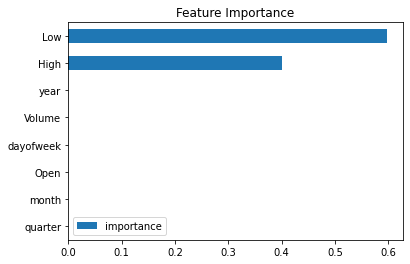

In [224]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=X_train.columns,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

This code generates a horizontal bar plot to visualize the feature importance of the input variables in the trained XGBoost regression model. pd.DataFrame(data=reg.feature_importances_, index=X_train.columns, columns='importance') creates a pandas DataFrame named fi. The XGBoost regression model stores the feature importances. Reg.feature_importances_ retrieves the feature importances calculated by the XGBoost model. In the training set, the index parameter represents the column names of the input features. The columns parameter is set as ['importance'], defining the column name for the feature importances in the DataFrame. The plot method of fi.sort_values('importance').plot() generates a horizontal bar plot. Using fi.sort_values('importance'), the feature importances are sorted ascending. To create a horizontal bar plot, the kind parameter is set to 'barh'. The title parameter is set as 'Feature Importance' to provide a title for the plot.
plt.show() displays the plot to the user.
This code creates a horizontal bar plot to visualize the relative importance of the input variables in the trained XGBoost regression model. Plotting the model's predictions helps us understand which features are most significant.

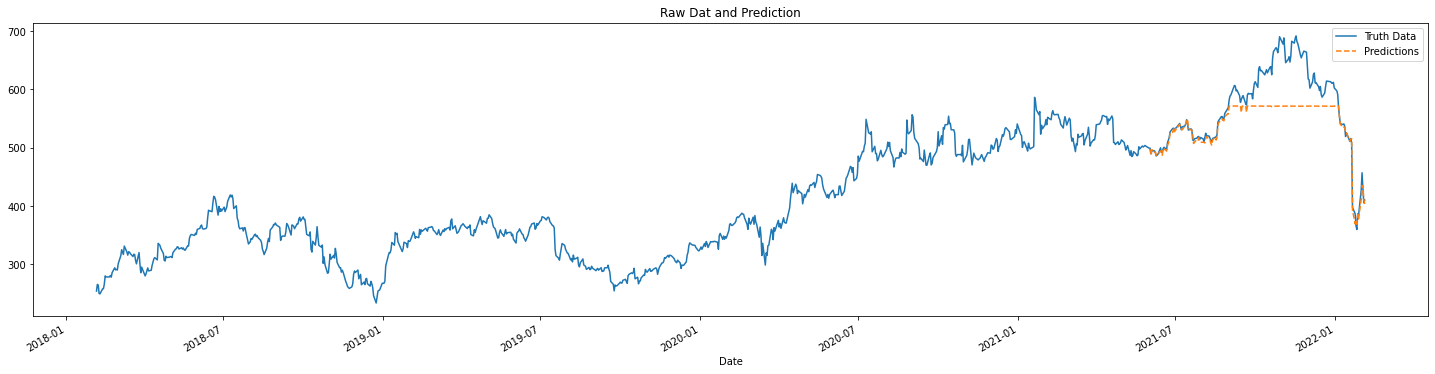

In [225]:
y_test['prediction'] = reg.predict(X_test)
df = df.merge(y_test[['prediction']], how='left', left_index=True, right_index=True)
ax = df[['Close']].plot(figsize=(25, 6))
df['prediction'].plot(ax=ax, style='--')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Dat and Prediction')
plt.show()

Using the trained XGBoost regression model, this code predicts the target variable's values and visualizes them. y_test['prediction'] = reg.predict(X_test) uses the trained XGBoost regression model (reg) and the input features (X_test) to predict the target variable values. In the DataFrame y_test, a new column named 'prediction' stores the predicted values. df = df.merge(y_test[['prediction']], how='left', left_index=True, right_index=True) merges the predicted values (the 'prediction' column) from the y_test DataFrame into the original DataFrame df. 'left_index=True' indicates that the merge is based on the index of df, and 'right_index=True' indicates that the merge is based on the index of y_test. The 'how' parameter is set as 'left', which means that only the rows from df are kept in the merged DataFrame. As a result, ax = df[['Close']].plot(figsize=(25, 6)) plots the 'Close' column on the y-axis of the DataFrame df. The figsize parameter sets the size of the figure in inches.
df['prediction'].plot(ax=ax, style='--') plots the 'prediction' column of the DataFrame df (predicted values) on the y-axis using a dashed line style ('--').
plt.legend(['Truth Data', 'Predictions']) adds a legend to the plot to differentiate between the actual values ('Truth Data') and the predicted values ('Predictions').
ax.set_title('Raw Data and Prediction') sets the title of the plot as 'Raw Data and Prediction'.
plt.show() displays the plot to the user.
In summary, this code predicts the target variable values using the trained XGBoost regression model and merges the predicted values into the original DataFrame. Using a line plot, the actual ('close' column) and predicted ('prediction' column) values can be compared and evaluated visually.